[ベイズ最適化入門](https://qiita.com/masasora/items/cc2f10cb79f8c0a6bbaa)  
https://github.com/Ma-sa-ue/practice/blob/master/machine%20learning(python)/bayeisan_optimization.ipynb  
The original code is based on python2.
A few modifications to fit it to python3 are needed.

In [1]:
%matplotlib inline
%run functions.py
np.random.seed(seed=123)

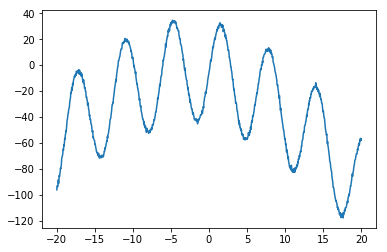

In [2]:
#Define data, supervised data
def target_func(x):
    return 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)
#
x = np.linspace(-20,20,1000)
z = list(map(target_func,x)) #for python3
z = np.array(z)
plt.plot(x, z) #### plot true data
plt.show()
def generate_sample(xval):
    xid = np.argmin((x - xval)**2)
    return z[xid]

In [3]:
#Define GPR and Bayesian opt.
GPR = Gaussian_Process_Regression()
print('# The choice of the kernel: ', GPR.kernel_name1)
BO = Bayesian_opt()
BO.aqui_name = 'EI'
BO.aqui_name = 'PI'
BO.aqui_name = 'UCB'
print('# The choice of acquisition function: ',BO.aqui_name)

# The choice of the kernel:  RBF
# The choice of acquisition function:  UCB


x_point, maxval = 9.68836939984255,  Initial
x_point, maxval = -20.0,  -44.79503753721859
x_point, maxval = -4.904904904904905,  -44.79503753721859
x_point, maxval = -3.6236236236236223,  33.436360491016515
x_point, maxval = -7.227227227227228,  33.436360491016515
x_point, maxval = -4.784784784784785,  33.436360491016515
x_point, maxval = -4.584584584584585,  34.680460904520565
x_point, maxval = 1.541541541541541,  34.680460904520565
x_point, maxval = -11.751751751751751,  34.680460904520565
x_point, maxval = -0.18018018018018012,  34.680460904520565
x_point, maxval = 5.3853853853853835,  34.680460904520565
x_point, maxval = -10.11011011011011,  34.680460904520565
x_point, maxval = -15.715715715715715,  34.680460904520565
x_point, maxval = 12.392392392392395,  34.680460904520565
x_point, maxval = -14.074074074074074,  34.680460904520565
x_point, maxval = -18.23823823823824,  34.680460904520565
x_point, maxval = 3.7437437437437424,  34.680460904520565
x_point, maxval = 15.51551551551551

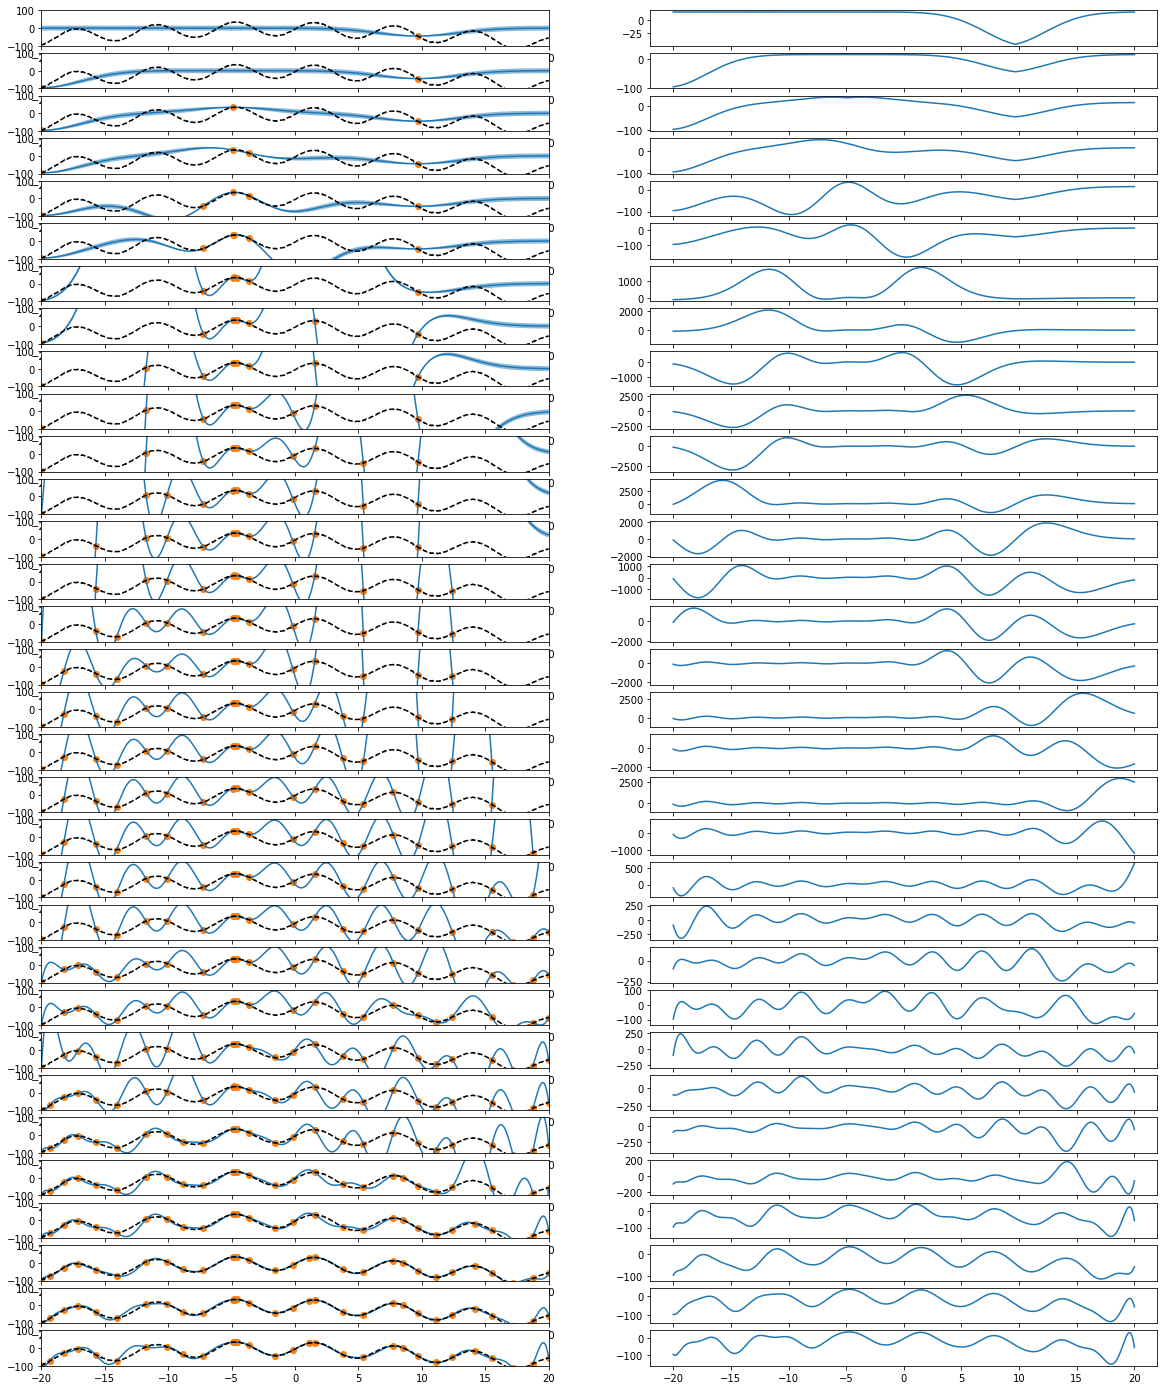

# Actual value of maximum is [34.6804609]
# Got value in the Bayesian_opt is 34.680460904520565
# Optimization is finished.


In [4]:
#Definition of array
x_sample = np.array([])
y_sample = np.array([])
x_point = np.random.uniform(-20,20) #Initial point is randomely chosen
#
epoch = 32 #Number of optimization
Nplotevery = 1
maxval = 'Initial'
plt.figure(figsize=(20, 50))
for i in range(epoch):
    if x_point not in x_sample:
        x_sample = np.append(x_sample,x_point)                          #Add x_point to x_sample
        y_point = generate_sample(x_point)                              #Get y_point value from x_sample
        y_sample = np.append(y_sample,y_point)                          #Add y_point to x_ample
        print ("x_point, maxval = "+str(x_point)+',  '+str(maxval))
    else: 
        print('No new sampling point in this sequence.')
    mean, std = GPR.xsample2meanvariance(x_sample, y_sample, x, eps = 1.0e-10) #Get mean/std
    maxval = max(y_sample)                                                     #Update maximum value up to now
    aqui = BO.get_aqui(mean, std, maxval)                                      #Define acquisition function
    x_point = x[np.argmax(aqui)]                                               #Determin the next candidate of the search
    if(i%Nplotevery==0):
        plt.subplot(epoch*2,2,i*2+1)
        plt.plot(x,np.array(mean))
        plt.plot(x,z,'k--')
        high_bound = mean+ 1.0*std
        lower_bound = mean- 1.0*std
        plt.fill_between(x,high_bound,lower_bound, alpha=0.5)
        plt.xlim(-20,20)
        plt.ylim(-100,100)
        plt.scatter(x_sample,y_sample)
        plt.subplot(epoch*2,2,i*2+2)
        plt.plot(x,aqui)
        plt.savefig("bayes_"+str(BO.aqui_name)+".png")
plt.show()

print("# Actual value of maximum is "+str(max(z)))
print("# Got value in the Bayesian_opt is "+str(maxval))
print("# Optimization is finished.")